In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("sample_data/abalone.csv")

In [4]:
print(data)

     Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]


In [6]:
# STEP 1 :- Splitting in train and test
X_train = data[:1000]
X_test = data[1000:]

In [7]:
print("Training data set is ")
print(X_train)

Training data set is 
    Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0     M   0.455     0.365  ...          0.1010         0.150     15
1     M   0.350     0.265  ...          0.0485         0.070      7
2     F   0.530     0.420  ...          0.1415         0.210      9
3     M   0.440     0.365  ...          0.1140         0.155     10
4     I   0.330     0.255  ...          0.0395         0.055      7
..   ..     ...       ...  ...             ...           ...    ...
995   M   0.580     0.490  ...          0.2565         0.237      9
996   M   0.590     0.465  ...          0.2615         0.275     11
997   M   0.590     0.470  ...          0.2425         0.309      8
998   F   0.590     0.455  ...          0.2445         0.250      8
999   F   0.595     0.470  ...          0.1780         0.155     11

[1000 rows x 9 columns]


In [8]:
print("Testing data set is")
print(X_test)

Testing data set is
     Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
1000   F   0.595     0.450  ...          0.2205        0.2500     11
1001   M   0.595     0.475  ...          0.2435        0.2740      9
1002   F   0.595     0.460  ...          0.2095        0.2515      9
1003   M   0.595     0.455  ...          0.2205        0.2700      9
1004   F   0.605     0.490  ...          0.2645        0.2950      9
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[3177 rows x 9 columns]


In [24]:
# STEP 2 - Performing linear regression analysis with Least Square Method
X = X_train['Viscera weight']
Y = X_train['Shell weight']
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [25]:
print(X)     #Viscera weight

0      0.1010
1      0.0485
2      0.1415
3      0.1140
4      0.0395
        ...  
995    0.2565
996    0.2615
997    0.2425
998    0.2445
999    0.1780
Name: Viscera weight, Length: 1000, dtype: float64


In [15]:
print(Y)      #Shell weight

0      0.150
1      0.070
2      0.210
3      0.155
4      0.055
       ...  
995    0.237
996    0.275
997    0.309
998    0.250
999    0.155
Name: Shell weight, Length: 1000, dtype: float64


In [26]:
print("Mean of X values")
print(mean_x)

Mean of X values
0.15484450000000033


In [13]:
print("Mean of Y values")
print(mean_y)

Mean of Y values
0.2175919999999998


For Training Data

In [27]:
# Calculating values of slope and y intercept
# y = mx + c
n = len(X)
print("Number of samples in training dataset are")
print(n)

Number of samples in training dataset are
1000


In [28]:
numerator = 0
denominator = 0
for i in range (n):
  numerator += (X[i] - mean_x) * (Y[i] - mean_y)
  denominator += (X[i] - mean_x) ** 2

m = numerator / denominator
c = mean_y - (m * mean_x)

print("The coefficients are as follows:")
print("Value of m:")
print(m)
print("Value of c:")
print(c)

The coefficients are as follows:
Value of m:
1.3244696758250043
Value of c:
0.012505155281714503


In [29]:
max_X = np.max(X)
print(max_X)

0.541


In [30]:
min_X = np.min(X)
print(min_X)

0.0005


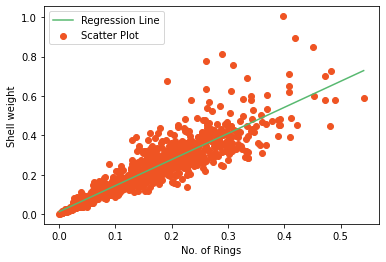

In [31]:
x = np.linspace(min_X,max_X,1000)
y = m * x + c
#Plotting line
plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c="#ef5423",label='Scatter Plot')

plt.xlabel('No. of Rings')
plt.ylabel('Shell weight')
plt.legend()
plt.show()

In [34]:
# Calculating Root mean squared error
rmse = 0
sse = 0
for i in range (n):
  y_pred = m * X[i] + c
  sse += (Y[i] - y_pred) ** 2

print("Mean Square Error for training data")
mse = sse/m
print(mse)
print("RMSE value")
rmse = np.sqrt(mse)
print(rmse)

Mean Square Error for training data
3.017551374045245
RMSE value
1.7371100638834733


For Testing data


In [37]:
# Calculating values of slope and y intercept
# y = mx + c
n1 = len(Y)
print("Number of samples in testing dataset are")
print(n1)

Number of samples in testing dataset are
1000


In [38]:
numerator = 0
denominator = 0
for i in range (n):
  numerator += (Y[i] - mean_y) * (X[i] - mean_x)
  denominator += (Y[i] - mean_y) ** 2

m = numerator / denominator
c = mean_x - (m * mean_y)

print("The coefficients are as follows:")
print("Value of m:")
print(m)
print("Value of c:")
print(c)

The coefficients are as follows:
Value of m:
0.608626256930474
Value of c:
0.02241229550198473


In [39]:
max_Y = np.max(Y)
print(max_Y)

1.005


In [40]:
min_Y = np.min(Y)
print(min_Y)

0.0015


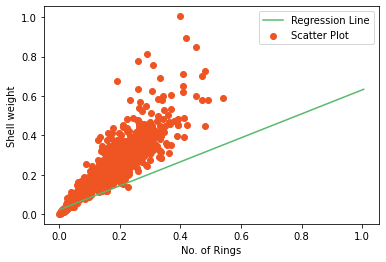

In [41]:
x = np.linspace(min_Y,max_Y,1000)
y = m * x + c
#Plotting line
plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c="#ef5423",label='Scatter Plot')

plt.xlabel('No. of Rings')
plt.ylabel('Shell weight')
plt.legend()
plt.show()

In [43]:
# Calculating Root mean squared error
rmse = 0
sse = 0
for i in range (n):
  y_pred = m * X[i] + c
  sse += (Y[i] - y_pred) ** 2

print("Mean Square Error for testing data")
mse = sse/m
print(mse)
print("RMSE value")
rmse = np.sqrt(mse)
print(rmse)

Mean Square Error for testing data
31.28153032984391
RMSE value
5.592989391179274
